In [1]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Import Our data and check it out

In [2]:
raw_data = pd.read_csv('train.csv')
raw_test_data = pd.read_csv('test.csv')
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Check any missing data

In [3]:
raw_data.isnull().sum()
raw_test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
## Split our data into Columns and Numerical features
num_cols = raw_data.select_dtypes(include=np.number).columns
cat_cols = raw_data.select_dtypes(include=['object']).columns
## Create dataframes of our features
num_data = raw_data[num_cols]
cat_data = raw_data[cat_cols]

# Add survived to our cat_data
cat_data['Survived'] = raw_data['Survived'].copy()


C:\Users\pc\AppData\Local\Temp\ipykernel_16328\1402285531.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['Survived'] = raw_data['Survived'].copy()


## Plot our Correlation Matrix using a heatmap



<AxesSubplot: >

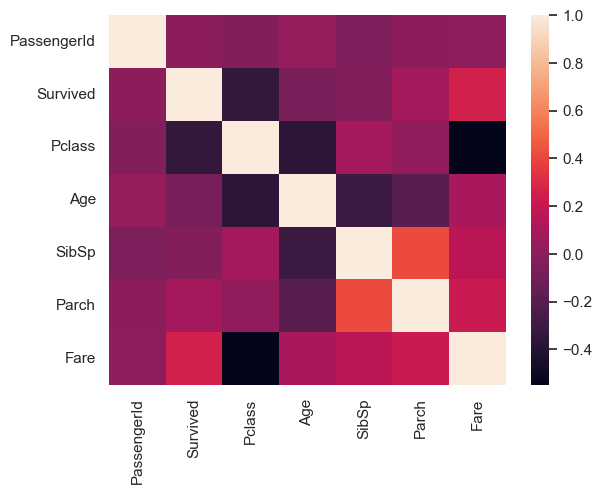

In [9]:
corr = raw_data.corr()
sns.heatmap(corr)

## Create a function to plot our numerical features distributions

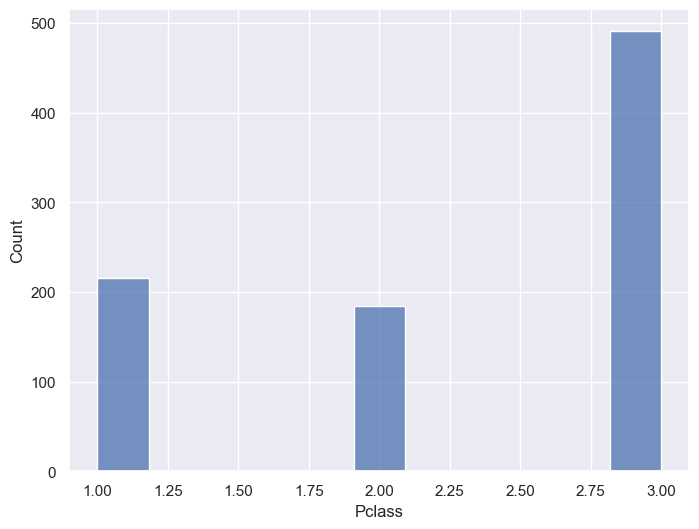

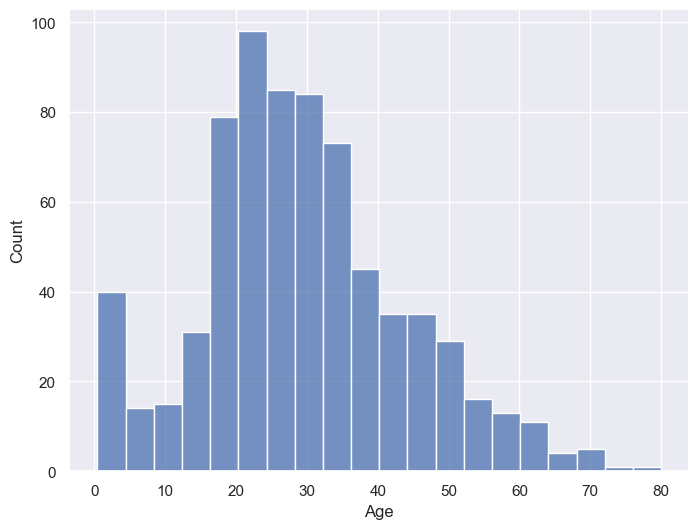

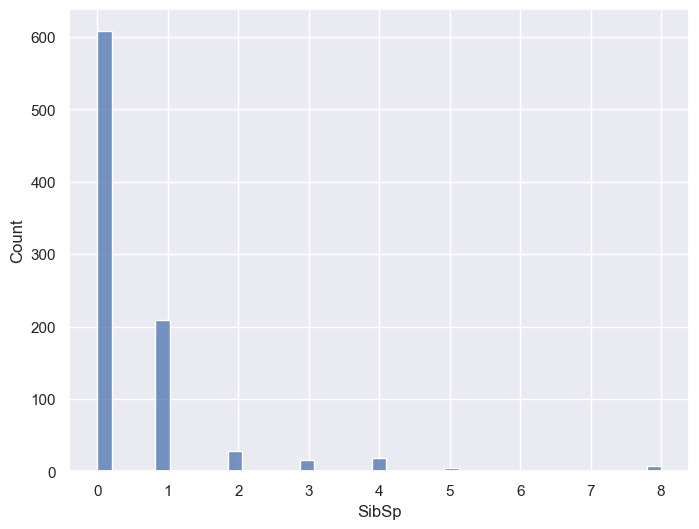

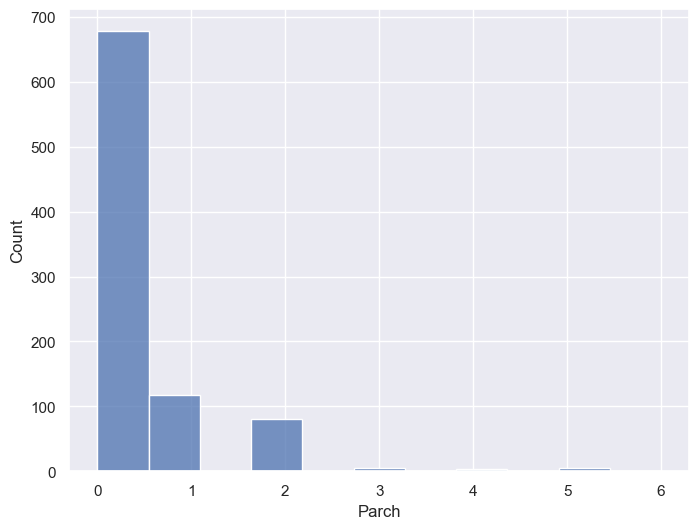

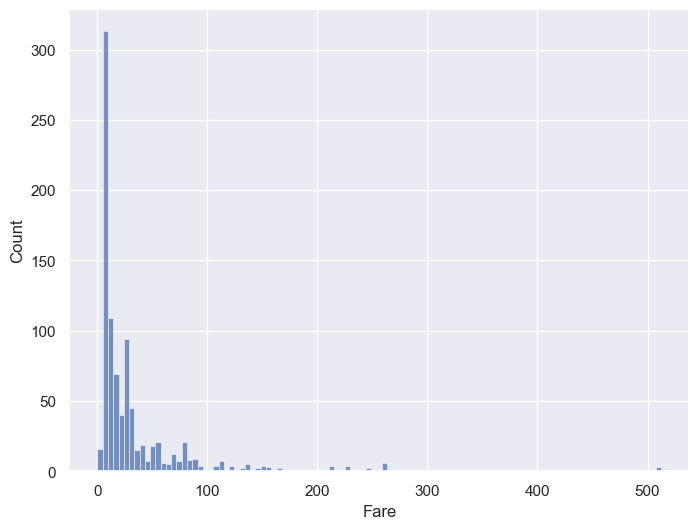

In [10]:
def plot_numerical_features(data):
    for col in data.iloc[:,2:].columns:
        fig, ax = plt.subplots(figsize=(8,6))
        sns.histplot(data[col], ax=ax)
        plt.show()
plot_numerical_features(num_data)        


## Now we will check our Age data distribution
We can see a few things
* As Pclass increases, more chances of Dying
*  Age isn't too clear, It makes Sense that it would be normally distributed
*  Higher fares indicates wealth which inturn would most likely lead to higher survival rates
*  Number of parents/children and Siblings isnt too clear what the correlation is, will need further Analysis

In [11]:
pd.pivot_table(num_data,index='Survived')


,Age,Fare,Parch,PassengerId,Pclass,SibSp
Survived,,,,,,
0,30.626179,22.117887,0.329690,447.016393,2.531876,0.553734
1,28.343690,48.395408,0.464912,444.368421,1.950292,0.473684


## I think plotting a KDE/Strip plot with that shows differnece in survival rates is more beneficial

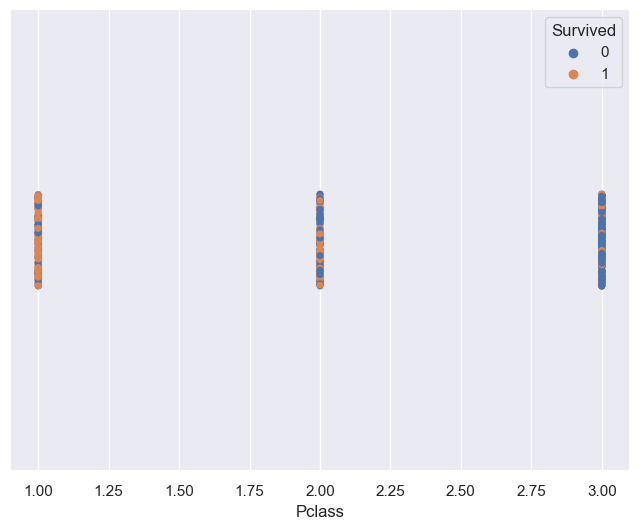

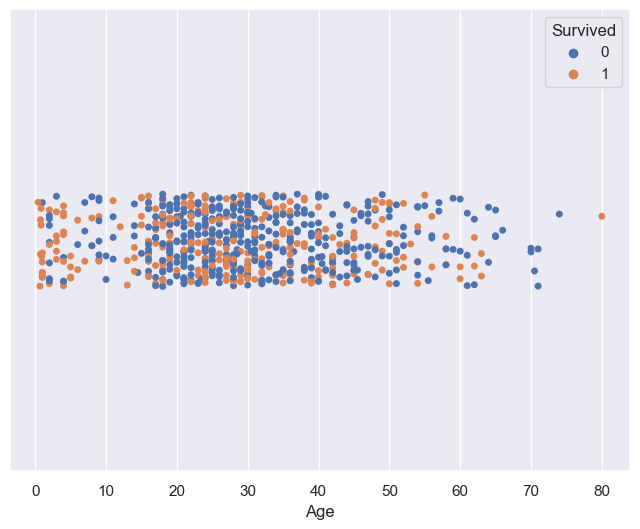

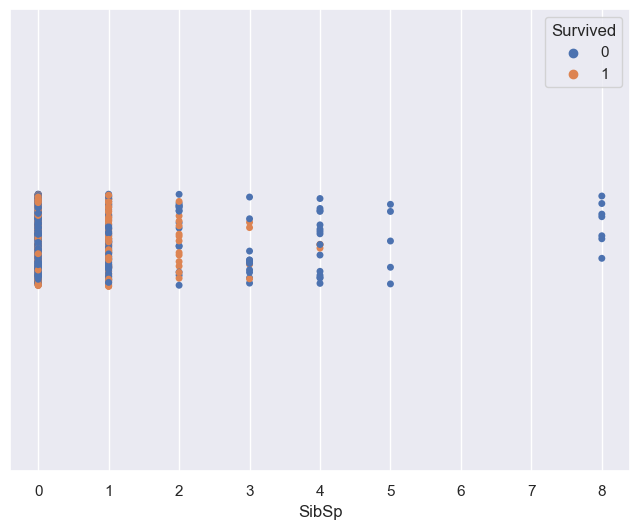

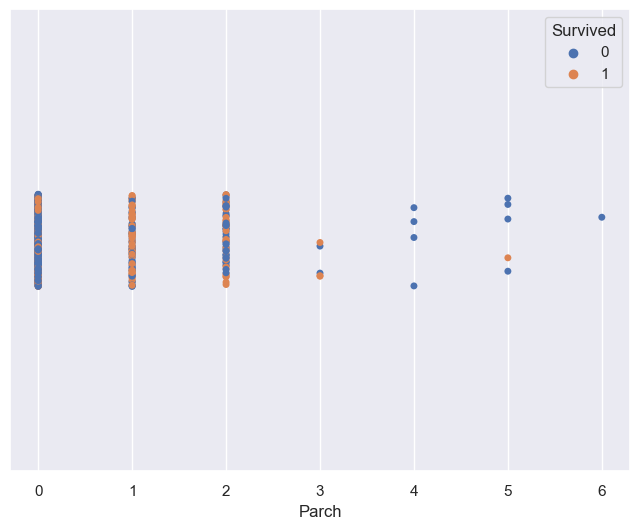

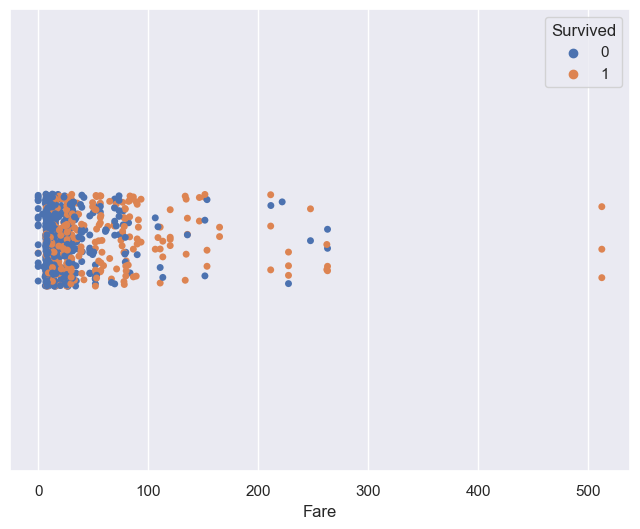

In [13]:
for col in num_data.iloc[:,2:].columns:
        fig, ax = plt.subplots(figsize=(8,6))
        sns.stripplot(x=num_data[col], ax=ax,hue=num_data.Survived)
        plt.show()

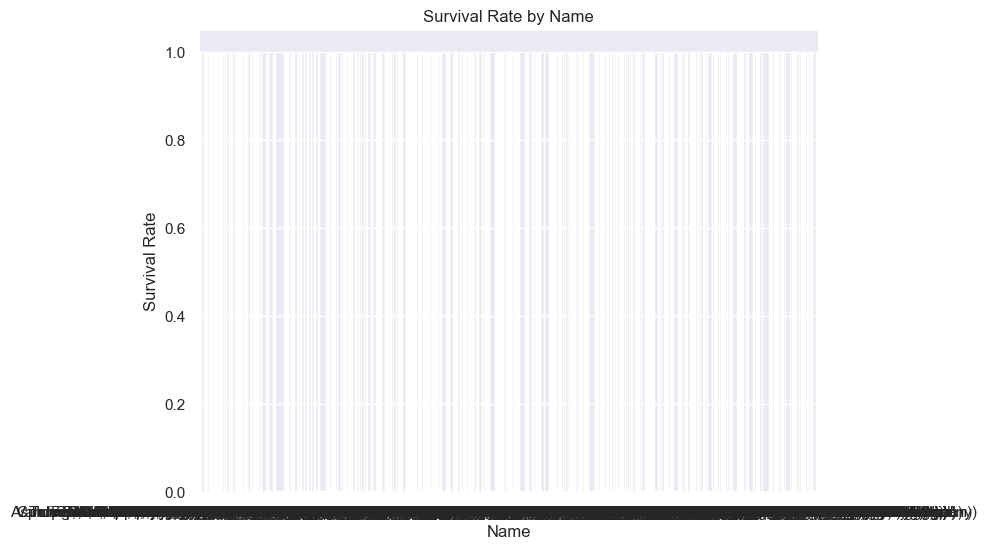

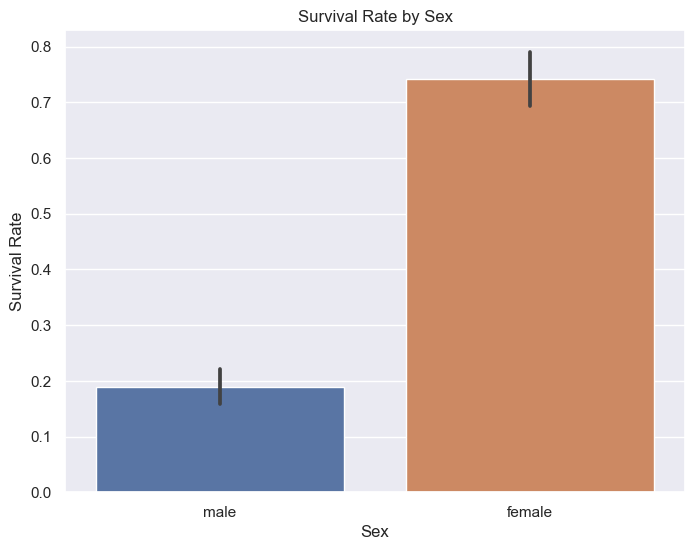

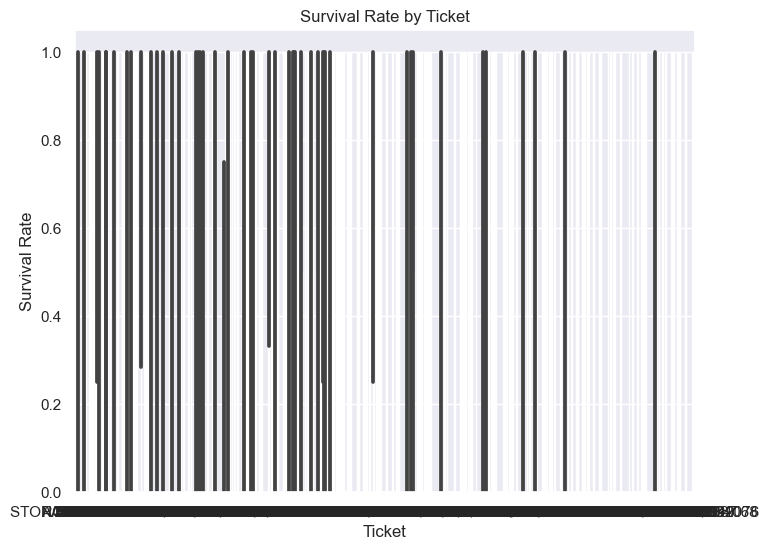

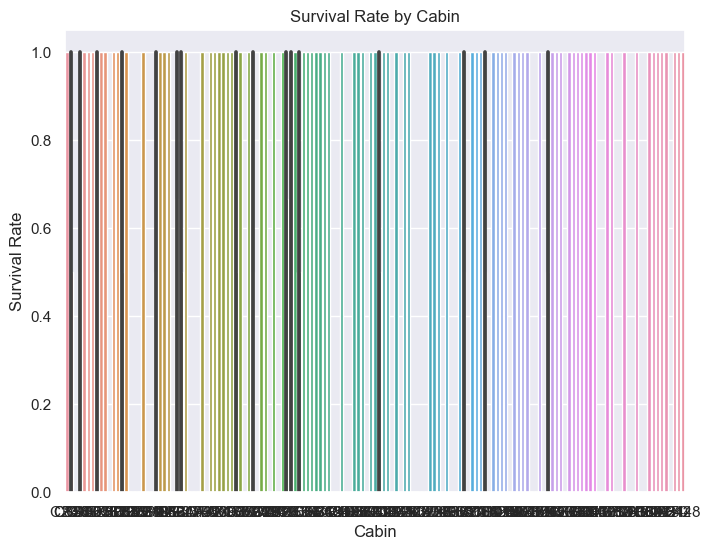

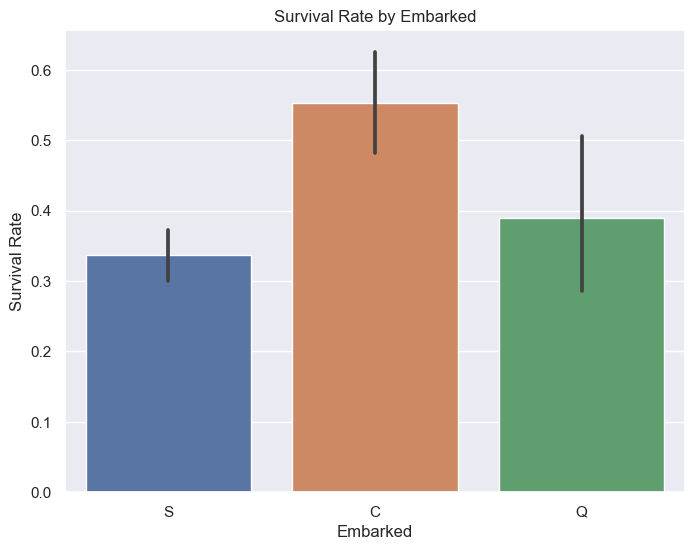

In [14]:
for col in cat_cols:
        if cat_data[col].dtype == 'object' and col != 'Survived':
            plt.figure(figsize=(8, 6))
            sns.barplot(x=col, y='Survived', data=cat_data)
            plt.title(f'Survival Rate by {col}')
            plt.ylabel('Survival Rate')
            plt.show()


# Too much variations in Cabin and ticket

In [15]:
raw_test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
##Individually check each Numerical feature, missing values first lets deal with those
data_no_mv = raw_data.copy()
test_data_no_mv = raw_test_data.copy()
data_no_mv.Age = raw_data.Age.fillna(raw_data.Age.median())
test_data_no_mv.Age = raw_test_data.Age.fillna(raw_data.Age.median())

In [17]:
cat_data.isnull().sum()
cat_data.Embarked.value_counts() ## There is only two missing vbalues for embarked so we will just add them to the Mode which is S
data_no_mv['Embarked'].fillna('S',inplace=True)

In [18]:
#Now we will look more at cabn, There is alot of missing values so it doesnt make sense so impute all of them at the moment, we could after taking a deeper analysis of our data but for now we will keep null as a category
# First we will use only the cabin letter and drop the Numbers
data_no_mv.Cabin.fillna('N0',inplace=True)
test_data_no_mv.Cabin.fillna('N0',inplace=True)
#We will also fill The fare with median value since its also missing
test_data_no_mv.Fare.fillna(raw_data.Fare.median(),inplace=True)


In [19]:
## Made 2 new columns of the cab char and the char numbers and then we will drop the original cabins ,ONLY ENDED UP USING cabin char
data_no_mv['Cab_char']= data_no_mv.Cabin.str[0]
test_data_no_mv['Cab_char']= test_data_no_mv.Cabin.str[0]

# data_no_mv['Cab_num'] = data_no_mv.Cabin.str[1:]
data_no_mv = data_no_mv.drop('Cabin', axis=1)
test_data_no_mv = test_data_no_mv.drop('Cabin', axis=1)



In [15]:
# data_no_mv.drop('Cab_num',axis=1,inplace=True)

N    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cab_char, dtype: int64

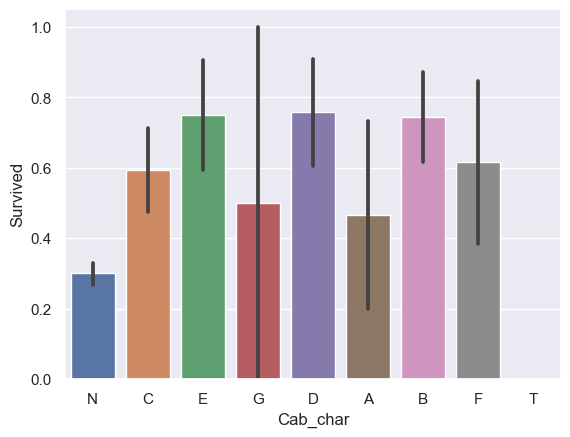

In [20]:
# Nowe we will plot our cabin and survived to try spot any patterns
sns.barplot(x='Cab_char',y='Survived',data = data_no_mv)
test_data_no_mv.Cab_char.value_counts()

We will be using the None cabin as it seems very impactful to the survival rate

In [21]:
# We will now take a look at the titles from the names
data_engineer = data_no_mv.copy()
test_data_engineer = test_data_no_mv.copy()
data_engineer['Title'] = data_engineer['Name'].str.extract(r',\s*([A-Za-z]+)\.', expand=False)
test_data_engineer['Title'] = data_engineer['Name'].str.extract(r',\s*([A-Za-z]+)\.', expand=False)
test_data_engineer.Title.value_counts() , data_engineer.Title.value_counts()


(Mr        228
 Miss      101
 Mrs        58
 Master     23
 Rev         3
 Dr          3
 Don         1
 Mme         1
 Name: Title, dtype: int64,
 Mr          517
 Miss        182
 Mrs         125
 Master       40
 Dr            7
 Rev           6
 Major         2
 Mlle          2
 Col           2
 Don           1
 Mme           1
 Ms            1
 Lady          1
 Sir           1
 Capt          1
 Jonkheer      1
 Name: Title, dtype: int64)

0

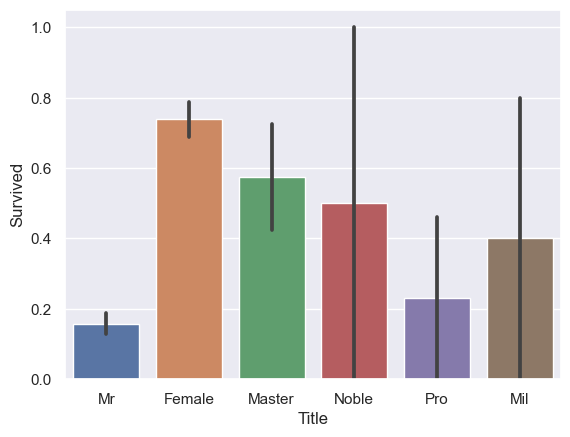

In [22]:
data_engineer.Title.value_counts()
titles_dict = {'Mil' : ['Col','Capt','Major'] ,
               'Noble':['Sir','Lady','Jonkheer','Don'],
               'Female': ['Miss','Mlle','Mme','Ms','Mrs'],
              'Pro' : ['Rev','Dr']
              }
for keys ,values in titles_dict.items():
    data_engineer['Title'] = data_engineer['Title'].replace(values,keys)
    test_data_engineer['Title'] = test_data_engineer['Title'].replace(values,keys)
sns.barplot(x='Title',y='Survived',data = data_engineer)    
test_data_engineer.Title.isnull().sum()


In [23]:
data_engineer[data_engineer.Title.isnull()] #it seems that our original way of extracting titles didnt do so for The countess so we will add it to the royals/nobles
data_engineer.Title.fillna('Noble',inplace=True)



# We can clearly see how signifcant it is Being a Miss/Master as opposed to being a Mr,  My intuition was that military personnel and doctors/religious professions would more likely to die so we will see

<AxesSubplot: xlabel='Fare'>

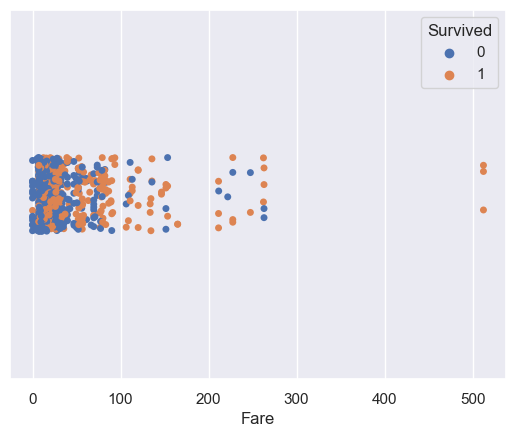

In [24]:
sns.stripplot(x=data_engineer.Fare,hue=data_engineer.Survived)

##We definitely need to handle our outliers here

In [25]:
## I decided I will try a log transofrmation on our fare feature since its heavily Right skewed
data_engineer['Fare_tranform'] = np.log1p(data_engineer.Fare)
test_data_engineer['Fare_tranform'] = np.log1p(test_data_engineer.Fare)


<AxesSubplot: xlabel='Fare_tranform', ylabel='Density'>

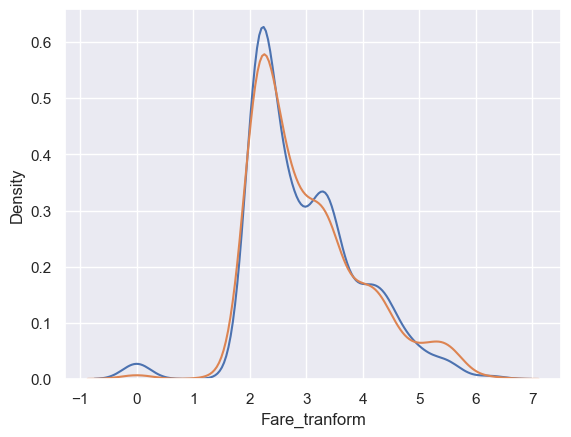

In [26]:
copy_data_engineer = data_engineer.copy()
copy_test_data_engineer = test_data_engineer.copy()
sns.kdeplot(data_engineer.Fare_tranform)
sns.kdeplot(test_data_engineer.Fare_tranform)

In [27]:
def clip_outliers(df, column, mode, threshold=3):
    """
    Clips outliers from a given column in a dataframe using the specified mode and threshold.
    
    Parameters:
    df (pandas.DataFrame): The dataframe to clip.
    column (str): The name of the column to clip.
    mode (str): The mode of outlier detection to use (either 'z-score' or 'iqr').
    threshold (float): The threshold to use for outlier detection. The exact meaning depends on the mode.
    
    Returns:
    A new dataframe with the specified column clipped of outliers.
    """
    
    # Make a copy of the original dataframe
    clipped_df = df.copy()
    
    if mode == 'z-score':
        # Calculate the z-scores for the column
        z_scores = (clipped_df[column] - clipped_df[column].mean()) / clipped_df[column].std()
        
        # Clip outliers based on the z-score threshold
        clipped_df[column] = clipped_df[column].clip(lower=df[column][z_scores > -threshold].min(),
                                                     upper=df[column][z_scores < threshold].max())
        
    elif mode == 'iqr':
        # Calculate the IQR for the column
        q1, q3 = np.percentile(clipped_df[column], [25, 75])
        iqr = q3 - q1
        
        # Clip outliers based on the IQR threshold
        lower_threshold = q1 - threshold * iqr
        upper_threshold = q3 + threshold * iqr
        clipped_df[column] = clipped_df[column].clip(lower=lower_threshold, upper=upper_threshold)
        
    else:
        raise ValueError(f"Invalid mode '{mode}' specified. Mode must be 'z-score' or 'iqr'.")
    
    return clipped_df


<AxesSubplot: xlabel='Fare_tranform'>

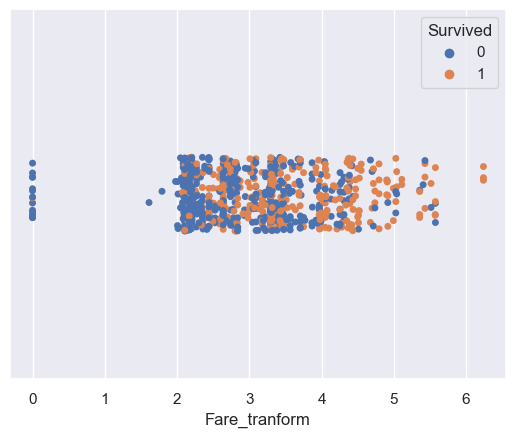

In [28]:
sns.stripplot(data = data_engineer,x='Fare_tranform',hue='Survived')

<AxesSubplot: xlabel='Fare_tranform'>

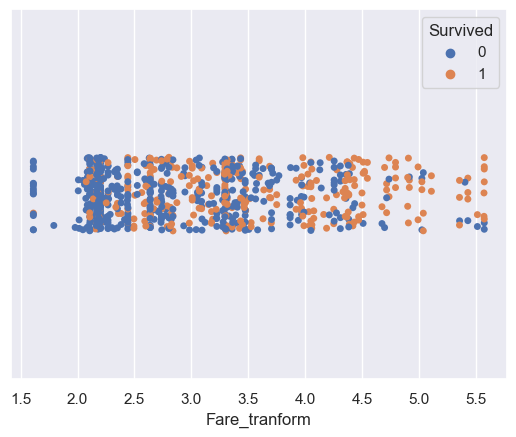

In [183]:
# clipped_data = data_engineer.copy()
# clipped_test_data = test_data_engineer.copy()

# clipped_data = clip_outliers(data_engineer,column='Fare_tranform',mode='z-score')
# clipped_test_data = clip_outliers(test_data_engineer,column='Fare_tranform',mode='z-score')
# # sns.stripplot(x=clipped_data.Fare_tranform,hue=data_engineer.Survived)
# sns.stripplot(x=clipped_data.Fare_tranform,hue=clipped_data.Survived)



## Clip our Age outliers using Z-SCORE

<AxesSubplot: xlabel='Age'>

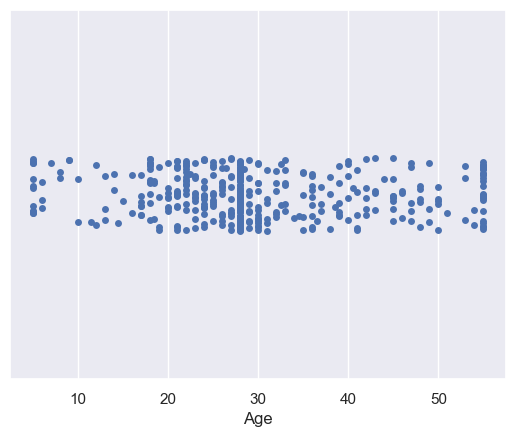

In [184]:
# clipped_data = clip_outliers(clipped_data,column='Age',mode='z-score',threshold=2)
# # sns.stripplot(x=clipped_data.Age,hue=clipped_data.Survived)
# # sns.kdeplot(x=clipped_data.Age,hue=clipped_data.Survived)

# clipped_test_data = clip_outliers(clipped_test_data,column='Age',mode='z-score',threshold=2)
# sns.stripplot(x=clipped_test_data.Age)


## Clip any values above 4 to be 6 to reduce our spread as its unnecessary

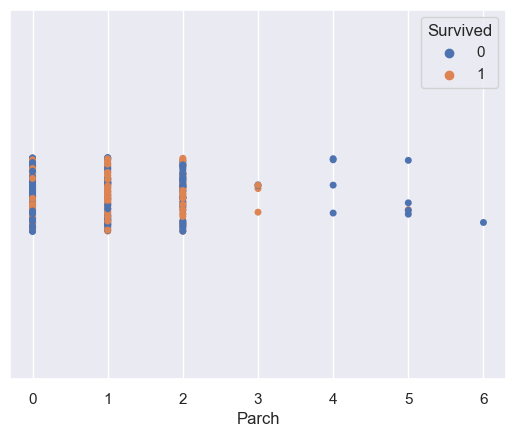

In [185]:
# sns.stripplot(x=clipped_data.Parch,hue=clipped_data.Survived)
# clipped_data.loc[clipped_data['Parch']>4,'Parch'] = 4
# clipped_test_data.loc[clipped_test_data['Parch']>4,'Parch'] = 4 

<AxesSubplot: xlabel='Parch'>

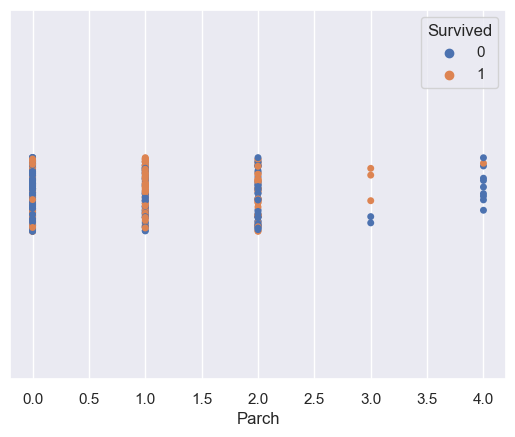

In [186]:
# sns.stripplot(x=clipped_data.Parch,hue=clipped_data.Survived)


## Clip any values above 5 Siblings

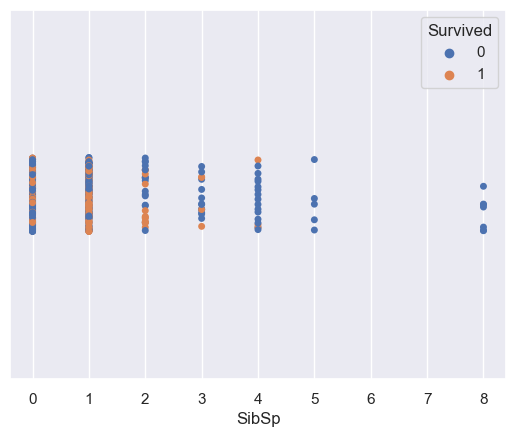

In [187]:
# sns.stripplot(x=clipped_data.SibSp,hue=clipped_data.Survived)
# # sns.stripplot(x=clipped_test_data.SibSp)

# clipped_data.loc[clipped_data['SibSp']>5,'SibSp'] = 5
# clipped_test_data.loc[clipped_test_data['SibSp']>5,'SibSp'] = 5

<AxesSubplot: xlabel='SibSp'>

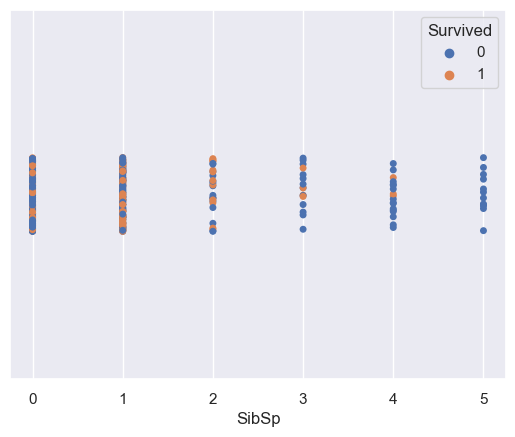

In [188]:
# sns.stripplot(x=clipped_data.SibSp,hue=clipped_data.Survived)

In [41]:
# data_no_outliers = clipped_data.copy()
# test_data_no_outliers = clipped_test_data.copy()
data_no_outliers = data_engineer.copy()
test_data_no_outliers = test_data_engineer.copy()

#Drop ticket, name and , fare since I dont think they will be very relevant
data_no_outliers.drop(columns=['Fare','Ticket','Name'],inplace=True)
test_data_no_outliers.drop(columns=['Fare','Ticket','Name'],inplace=True)





## Scaling Function

Now we will create a function that will scale the columns we give, we dont need to scale all our columns we only need to scale some of them Age,Fare we are creating a function as to make it easier while changing our model

In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

def scale_dataframe_columns(df, columns, method='standard'):
    """
    Scales the specified columns of a pandas DataFrame using one of the scaling methods available in sklearn.

    Parameters:
        df (pandas.DataFrame): The input DataFrame.
        columns (list of str): The names of the columns to scale.
        method (str, optional): The scaling method to use. Must be one of 'standard', 'minmax', or 'robust'. Default is 'standard'.

    Returns:
        pandas.DataFrame: The scaled DataFrame.
    """
    df_new = df.copy()
    scaler = None
    if method == 'standard':
        scaler = StandardScaler()
    elif method == 'minmax':
        scaler = MinMaxScaler()
    elif method == 'robust':
        scaler = RobustScaler()
    else:
        raise ValueError(f"Unknown scaling method '{method}'")

    scaled_data = scaler.fit_transform(df[columns])
    df_new[columns] = scaled_data

    return df_new


In [45]:
scaled_test_dataframe

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Cab_char,Title,Fare_tranform
0,892,3,male,0.371062,0,0,Q,N,Mr,-0.867031
1,893,3,female,1.358985,1,0,S,N,Female,-0.969149
2,894,2,male,2.544493,0,0,Q,N,Female,-0.669252
3,895,3,male,-0.221692,0,0,S,N,Female,-0.773647
4,896,3,female,-0.616861,1,1,S,N,Mr,-0.443786
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,-0.142658,0,0,S,N,Mr,-0.841455
414,1306,1,female,0.726714,0,0,C,C,Mr,1.743832
415,1307,3,male,0.687197,0,0,S,N,Female,-0.937287
416,1308,3,male,-0.142658,0,0,S,N,Female,-0.841455


In [44]:
scaled_dataframe = scale_dataframe_columns(data_no_outliers,columns=['Age','Fare_tranform'],method='standard')
scaled_test_dataframe = scale_dataframe_columns(test_data_no_outliers,columns=['Age','Fare_tranform'],method='standard')

<AxesSubplot: ylabel='Frequency'>

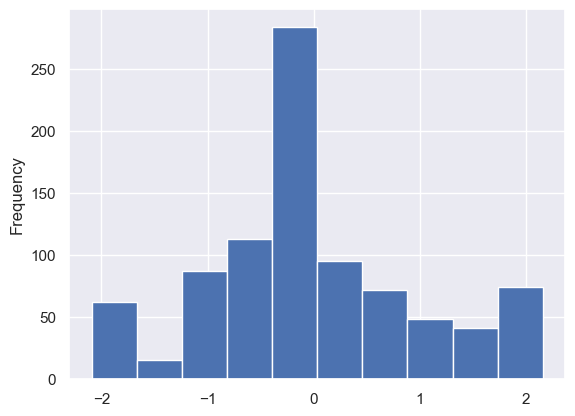

In [194]:
scaled_dataframe.Age.plot.hist()


In [46]:
inputs = scaled_dataframe.drop(columns=['PassengerId','Survived'])
test_inputs = scaled_test_dataframe.drop(columns=['PassengerId'])
targets = scaled_dataframe['Survived']

In [47]:
inputs_dummies = pd.get_dummies(columns=['Embarked','Cab_char','Title','Sex'],drop_first=True,data=inputs)
inputs_test_dummies = pd.get_dummies(columns=['Embarked','Cab_char','Title','Sex'],drop_first=True,data=test_inputs)



In [48]:
inputs_dummies.columns  , inputs_test_dummies.columns 

(Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare_tranform', 'Embarked_Q',
        'Embarked_S', 'Cab_char_B', 'Cab_char_C', 'Cab_char_D', 'Cab_char_E',
        'Cab_char_F', 'Cab_char_G', 'Cab_char_N', 'Cab_char_T', 'Title_Master',
        'Title_Mil', 'Title_Mr', 'Title_Noble', 'Title_Pro', 'Sex_male'],
       dtype='object'),
 Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare_tranform', 'Embarked_Q',
        'Embarked_S', 'Cab_char_B', 'Cab_char_C', 'Cab_char_D', 'Cab_char_E',
        'Cab_char_F', 'Cab_char_G', 'Cab_char_N', 'Title_Master', 'Title_Mr',
        'Title_Noble', 'Title_Pro', 'Sex_male'],
       dtype='object'))

## We notice 2 issues, cab_t wasnt in our test set so we need to add a column and make all its values zeros, same applies for military titles

In [49]:
inputs_col_order = inputs_dummies.columns 
inputs_test_dummies['Cab_char_T'] = 0
inputs_test_dummies['Title_Mil'] = 0
## Change order of our columns to match our inputs
inputs_test_dummies.columns = inputs_dummies.columns 

In [50]:
inputs_dummies.head()

,Pclass,Age,SibSp,Parch,Fare_tranform,Embarked_Q,Embarked_S,Cab_char_B,Cab_char_C,Cab_char_D,...,Cab_char_F,Cab_char_G,Cab_char_N,Cab_char_T,Title_Master,Title_Mil,Title_Mr,Title_Noble,Title_Pro,Sex_male
0,3,-0.565736,1,0,-0.879741,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,1,0.663861,1,0,1.361220,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,-0.258337,0,0,-0.798540,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0.433312,1,0,1.062038,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0.433312,0,0,-0.784179,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1


## Train/dev split our model 

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(inputs_dummies,targets,test_size=0.2)

## Create a function that will evaluate a model and return Accuracy and confusion matrix

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay , f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

def evaluate_model(x_train, x_test, y_train, y_test, model):
    # fit the model to the training data
    model.fit(x_train, y_train)
    
    # make predictions on the test data
    y_pred = model.predict(x_test)
    
    # calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # # plot confusion matrix
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    # disp.plot()
    f1 = f1_score(y_test,y_pred)
    # return accuracy and confusion matrix
    return accuracy, cm , f1


## Create the list of  the models that we would like to evaluate and loop through them printing out the CM and their relative accuracy

In [53]:
# create a list of models to evaluate
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    GaussianNB(),
    KNeighborsClassifier(7),
    SVC()
]

# iterate through the list of models and evaluate each one
for model in models:
    accuracy, cm,f1 = evaluate_model(x_train, x_test, y_train, y_test,model)
    print(model.__class__.__name__)
    print("Accuracy:", accuracy,"F1_Score:", f1)
    print("Confusion Matrix:\n", cm)
    print("="*80)


LogisticRegression
Accuracy: 0.8100558659217877 F1_Score: 0.757142857142857
Confusion Matrix:
 [[92 14]
 [20 53]]
RandomForestClassifier
Accuracy: 0.8156424581005587 F1_Score: 0.7591240875912408
Confusion Matrix:
 [[94 12]
 [21 52]]
GaussianNB
Accuracy: 0.7597765363128491 F1_Score: 0.6504065040650406
Confusion Matrix:
 [[96 10]
 [33 40]]
KNeighborsClassifier
Accuracy: 0.8156424581005587 F1_Score: 0.7480916030534351
Confusion Matrix:
 [[97  9]
 [24 49]]
SVC
Accuracy: 0.8212290502793296 F1_Score: 0.7681159420289856
Confusion Matrix:
 [[94 12]
 [20 53]]


C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Trying a Hard voting Classifier 

In [213]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier


# create a list of models to include in the ensemble
models = [
    ('log_reg', LogisticRegression()),
    ('dt', DecisionTreeClassifier()),
    ('knn', KNeighborsClassifier())
]

# create the ensemble model with hard voting
hard_voting_model = VotingClassifier(estimators=models, voting='hard')

# fit the model to the training data and make predictions on the test data
hard_voting_model.fit(x_train, y_train)
y_pred_hard = hard_voting_model.predict(x_test)

# calculate accuracy score
accuracy_hard = accuracy_score(y_test, y_pred_hard)

# print the accuracy score
print("Hard Voting Accuracy:", accuracy_hard)


Hard Voting Accuracy: 0.7988826815642458


C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Trying a soft voting classifer

In [215]:
# create a list of models to include in the ensemble
models = [
    ('log_reg', LogisticRegression()),
    ('knn', KNeighborsClassifier())
]

# create the ensemble model with soft voting
soft_voting_model = VotingClassifier(estimators=models, voting='soft')

# fit the model to the training data and make predictions on the test data
soft_voting_model.fit(x_train, y_train)
y_pred_soft = soft_voting_model.predict(x_test)

# calculate accuracy score
accuracy_soft = accuracy_score(y_test, y_pred_soft)

# print the accuracy score
print("Soft Voting Accuracy:", accuracy_soft)


Soft Voting Accuracy: 0.8100558659217877


In [216]:

from sklearn.model_selection import GridSearchCV

parameters=[]
# Define a dictionary of hyperparameters to search over for each algorithm
# You can modify this dictionary to include different hyperparameters and values
# to search over for each algorithm
param_grids = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10]},
    'Naive Bayes': {},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale']}
}

# Train and test multiple classification models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

for name, model in models.items():
    # Define the grid search using the hyperparameters in param_grids
    grid_search = GridSearchCV(model, param_grids[name], cv=5, n_jobs=-1)
    
    # Fit the grid search to the training data
    grid_search.fit(inputs_dummies, targets)
    
    # Print the best hyperparameters found by the grid search
    print(f"Best hyperparameters for {name}: {grid_search.best_params_}")
    parameters.append(grid_search.best_params_)

Best hyperparameters for Logistic Regression: {'C': 1}
Best hyperparameters for Naive Bayes: {}
Best hyperparameters for K-Nearest Neighbors: {'n_neighbors': 5}
Best hyperparameters for Support Vector Machine: {'C': 1, 'gamma': 0.1}


In [217]:
## Modify my previous evaluate_model Function to include a parameters dictionary that will include the optimal parameters for each model/
def evaluate_cv_model(x_train, x_test, y_train, y_test, model,parameters):
    # fit the model to the training data
    model.set_params(**parameters)
    model.fit(x_train, y_train)
    
    # make predictions on the test data
    y_pred = model.predict(x_test)
    
    # calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # # plot confusion matrix
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    # disp.plot()
    f1 = f1_score(y_test,y_pred)
    # return accuracy and confusion matrix
    return accuracy, cm , f1



## Test models with new parameters

In [218]:
models_cv = [
    LogisticRegression(),
    GaussianNB(),
    KNeighborsClassifier(7),
    SVC()
]

# iterate through the list of models and evaluate each one
for i,model in enumerate(models_cv):
    accuracy, cm,f1 = evaluate_cv_model(x_train, x_test, y_train, y_test,model,parameters[i])
    print(model.__class__.__name__)
    print("Accuracy:", accuracy,"F1_Score:", f1)
    print("Confusion Matrix:\n", cm)
    print("="*80)


LogisticRegression
Accuracy: 0.8044692737430168 F1_Score: 0.7682119205298013
Confusion Matrix:
 [[86 15]
 [20 58]]
GaussianNB
Accuracy: 0.6983240223463687 F1_Score: 0.7
Confusion Matrix:
 [[62 39]
 [15 63]]
KNeighborsClassifier
Accuracy: 0.7821229050279329 F1_Score: 0.7417218543046357
Confusion Matrix:
 [[84 17]
 [22 56]]
SVC
Accuracy: 0.8156424581005587 F1_Score: 0.7692307692307693
Confusion Matrix:
 [[91 10]
 [23 55]]


C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Possible Improvments to be done

# Feature Engineering 
    Create a family variable
    2-Look more closely at cabin numbers or ticket numbers and see if they are important
    3- Create new feature to do with age*Class
# Different outlier techniques    
# Transformation/Scaling of Fare feature.    
# Use cross Validation to choose better hyper parameters

We will now import our test set and perform the same preprocessing as the train data


In [54]:
# Create a dataframe to store the test predictions
test_df = pd.DataFrame({'PassengerId': raw_test_data['PassengerId']})

# Train and test multiple classification models
models = {
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Logistic Regression' : LogisticRegression()
}

for name, model in models.items():
    # Train the model
    model.fit(inputs_dummies, targets)
    
    # Make predictions on the test set
    predictions = model.predict(inputs_test_dummies)
    
    # Store the predictions in a dataframe
    test_df['Survived'] = predictions

    # Save the test predictions to a file
    test_df.to_csv(str(name)+'_2.csv', index=False)


C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [56]:
import xgboost as xgb
model = xgb.XGBClassifier(learning_rate=0.01, n_estimators=500, max_depth=4)
print(evaluate_model(x_train, x_test, y_train, y_test,model))


(0.8379888268156425, array([[99,  7],
       [22, 51]], dtype=int64), 0.7786259541984732)


In [231]:
test_df = pd.DataFrame({'PassengerId': raw_test_data['PassengerId']})
test_df['Survived'] = model.predict(inputs_test_dummies)
test_df.to_csv('xgb_boost.csv', index=False)

In [232]:
from scipy.stats import randint, uniform
from sklearn.model_selection import train_test_split, RandomizedSearchCV
param_dist = {
    'max_depth': randint(1, 10),
    'learning_rate': uniform(0.01, 0.2),
    'n_estimators': randint(100, 1000),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 1)
}

# Define the XGBoost classifier
clf = xgb.XGBClassifier()

# Perform randomized search using RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1)
random_search.fit(x_train, y_train)

# Make predictions on the testing set using the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7932960893854749
